In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
import seaborn as sns

In [2]:
past = pd.read_excel('../3_res/Train Data.xlsx')
past.columns

Index(['TERM', 'CRS_ID', 'INST_COUNT', 'CRS_AT_HRS', 'NET_CRS_REVENUE', 'CWID', 'STU_LEV_C', 'STU_LEV_D', 'STU_LEV_G', 'STU_LEV_P',
       ...
       'FDB_Dept_Theatre Arts', 'FDB_Dept_University Library', 'FDB_Dept_Visual Arts', 'SCCH_RATIO', 'FDB_Dept', 'FDB_College', 'FY', 'yearly_rev', 'SCCH_RATIO_DEPT', 'yearly_rev_dist'], dtype='object', length=124)

In [3]:
current = pd.read_excel('../3_res/FY21 Students for merge.xlsx')

In [4]:
current.head()

,CRS_ID,CRS_AT_HRS,Enrollment,STU_LEV_C,STU_LEV_D,STU_LEV_G,STU_LEV_P,STU_LEV_U,STU_COHORT_A,STU_COHORT_E,STU_COHORT_G,STU_COHORT_H,STU_COHORT_Other,STU_DEPT_Accounting,STU_DEPT_BU,STU_DEPT_Biology,STU_DEPT_CAS,STU_DEPT_Chemistry,STU_DEPT_Communication,STU_DEPT_Computer Science,STU_DEPT_Counseling,STU_DEPT_Criminal Justice,STU_DEPT_Design,STU_DEPT_Economics,STU_DEPT_English,STU_DEPT_Environment,STU_DEPT_Exchange,STU_DEPT_Finance,STU_DEPT_History,STU_DEPT_Honors,STU_DEPT_LIM,STU_DEPT_Languages,STU_DEPT_Law,STU_DEPT_Management,STU_DEPT_Marketing,STU_DEPT_Math,STU_DEPT_Music,STU_DEPT_Music Industry,STU_DEPT_Nursing,STU_DEPT_Philosophy,STU_DEPT_Physics,STU_DEPT_Political Science,STU_DEPT_Psychology,STU_DEPT_Religious Studies,STU_DEPT_Sociology,STU_DEPT_Studio Art,STU_DEPT_Teacher Education,STU_DEPT_Theatre,STU_COL_BU,STU_COL_CAS,STU_COL_CMM,STU_COL_CNH,STU_COL_LAW
0,ACCTB202001,114.0,38,0,0,0,0,38,0,38,0,0,0,0,3,1,0,0,0,0,0,1,0,3,0,0,0,3,0,0,0,0,0,14,9,0,0,2,0,0,0,0,0,0,1,0,0,1,32,3,3,0,0
1,ACCTB202002,72.0,24,0,0,0,0,24,0,24,0,0,0,1,0,1,0,0,0,1,0,0,0,3,0,0,0,3,0,0,0,0,0,6,7,0,0,0,0,0,0,1,0,0,0,0,0,1,20,3,1,0,0
2,ACCTB202003,120.0,40,0,0,0,0,40,0,40,0,0,0,1,2,0,0,0,1,3,0,0,0,6,1,0,0,3,0,0,0,0,0,13,7,0,0,1,0,0,0,0,1,0,0,0,0,1,32,6,2,0,0
3,ACCTB203001,123.0,41,0,0,0,0,41,0,41,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,8,0,0,0,0,0,19,11,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0
4,ACCTB300001,48.0,16,0,0,0,0,16,0,16,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15,0,1,0,0


In [5]:
# drop variables not in current
past.drop(['INST_COUNT', 'NET_CRS_REVENUE', 'STU_DEPT_City College', 'STU_COL_Other', 'FDB_College_BU', 
              'FDB_College_CAS', 'FDB_College_CMM', 'FDB_College_CNH', 'FDB_College_LAW', 'FDB_College_Others', 
              'FDB_Dept_Accounting', 'FDB_Dept_Biology', 'FDB_Dept_Chemistry', 'FDB_Dept_Classical Studies', 
              'FDB_Dept_College of Law', 'FDB_Dept_Computer Sciences', 'FDB_Dept_Counseling', 'FDB_Dept_Criminal Justice', 
              'FDB_Dept_Criminology', 'FDB_Dept_Criminology and Justice', 'FDB_Dept_Department of Art', 'FDB_Dept_Design', 
              'FDB_Dept_Digital Filmmaking', 'FDB_Dept_Economics', 'FDB_Dept_English', 'FDB_Dept_Environment', 
              'FDB_Dept_Film', 'FDB_Dept_Finance', 'FDB_Dept_Food Studies', 'FDB_Dept_History', 'FDB_Dept_Honors', 
              'FDB_Dept_International Business', 'FDB_Dept_Jesuit Social Research Inst', 'FDB_Dept_LIM', 
              'FDB_Dept_Languages and Cultures', 'FDB_Dept_Law Clinic', 'FDB_Dept_Law Library', 
              'FDB_Dept_Loyola Institute for Ministry', 'FDB_Dept_MUIN', 'FDB_Dept_Magis Enrichment', 
              'FDB_Dept_Management', 'FDB_Dept_Marketing', 'FDB_Dept_Mathematical Sciences', 'FDB_Dept_Music', 
              'FDB_Dept_Music Prep', 'FDB_Dept_Philosophy', 'FDB_Dept_Physics', 'FDB_Dept_Political Science', 
              'FDB_Dept_Portfolio', 'FDB_Dept_Psychology', 'FDB_Dept_Religious Studies', 
              'FDB_Dept_School of Mass Communication', 'FDB_Dept_School of Nursing', 'FDB_Dept_SoMC', 'FDB_Dept_Sociology', 
              'FDB_Dept_Student Success', 'FDB_Dept_Studio Art', 'FDB_Dept_Teach', 'FDB_Dept_Teacher Certification', 
              'FDB_Dept_Theater Arts and Dance', 'FDB_Dept_Theatre Arts', 'FDB_Dept_University Library', 
              'FDB_Dept_Visual Arts', 'SCCH_RATIO', 'FDB_Dept', 'FDB_College', 'yearly_rev', 'SCCH_RATIO_DEPT'], 
             axis =1, inplace=True)

past.columns

Index(['TERM', 'CRS_ID', 'CRS_AT_HRS', 'CWID', 'STU_LEV_C', 'STU_LEV_D', 'STU_LEV_G', 'STU_LEV_P', 'STU_LEV_U', 'STU_COHORT_A', 'STU_COHORT_E', 'STU_COHORT_G', 'STU_COHORT_H', 'STU_COHORT_Other', 'STU_DEPT_Accounting', 'STU_DEPT_BU', 'STU_DEPT_Biology', 'STU_DEPT_CAS', 'STU_DEPT_Chemistry', 'STU_DEPT_Communication', 'STU_DEPT_Computer Science', 'STU_DEPT_Counseling', 'STU_DEPT_Criminal Justice', 'STU_DEPT_Design', 'STU_DEPT_Economics', 'STU_DEPT_English', 'STU_DEPT_Environment', 'STU_DEPT_Exchange', 'STU_DEPT_Finance', 'STU_DEPT_History', 'STU_DEPT_LIM', 'STU_DEPT_Languages', 'STU_DEPT_Law', 'STU_DEPT_Management', 'STU_DEPT_Marketing', 'STU_DEPT_Math', 'STU_DEPT_Music', 'STU_DEPT_Music Industry', 'STU_DEPT_Nursing', 'STU_DEPT_Philosophy', 'STU_DEPT_Physics', 'STU_DEPT_Political Science', 'STU_DEPT_Psychology', 'STU_DEPT_Religious Studies', 'STU_DEPT_Sociology', 'STU_DEPT_Studio Art', 'STU_DEPT_Teacher Education', 'STU_DEPT_Theatre', 'STU_COL_BU', 'STU_COL_CAS', 'STU_COL_CMM',
       'S

In [6]:
past.rename(columns={'CWID':'Enrollment'}, inplace=True)
current['TERM']='2020F'

a = past.columns.values.tolist()
b = current.columns.values.tolist()

set(a).intersection(b)

{'CRS_AT_HRS',
 'CRS_ID',
 'Enrollment',
 'STU_COHORT_A',
 'STU_COHORT_E',
 'STU_COHORT_G',
 'STU_COHORT_H',
 'STU_COHORT_Other',
 'STU_COL_BU',
 'STU_COL_CAS',
 'STU_COL_CMM',
 'STU_COL_CNH',
 'STU_COL_LAW',
 'STU_DEPT_Accounting',
 'STU_DEPT_BU',
 'STU_DEPT_Biology',
 'STU_DEPT_CAS',
 'STU_DEPT_Chemistry',
 'STU_DEPT_Communication',
 'STU_DEPT_Computer Science',
 'STU_DEPT_Counseling',
 'STU_DEPT_Criminal Justice',
 'STU_DEPT_Design',
 'STU_DEPT_Economics',
 'STU_DEPT_English',
 'STU_DEPT_Environment',
 'STU_DEPT_Exchange',
 'STU_DEPT_Finance',
 'STU_DEPT_History',
 'STU_DEPT_LIM',
 'STU_DEPT_Languages',
 'STU_DEPT_Law',
 'STU_DEPT_Management',
 'STU_DEPT_Marketing',
 'STU_DEPT_Math',
 'STU_DEPT_Music',
 'STU_DEPT_Music Industry',
 'STU_DEPT_Nursing',
 'STU_DEPT_Philosophy',
 'STU_DEPT_Physics',
 'STU_DEPT_Political Science',
 'STU_DEPT_Psychology',
 'STU_DEPT_Religious Studies',
 'STU_DEPT_Sociology',
 'STU_DEPT_Studio Art',
 'STU_DEPT_Teacher Education',
 'STU_DEPT_Theatre',
 'STU_

In [7]:
past['TERM'].value_counts(dropna=False)

2019F    1396
2018F    1337
2017F    1278
Name: TERM, dtype: int64

In [8]:
past.head()

,TERM,CRS_ID,CRS_AT_HRS,Enrollment,STU_LEV_C,STU_LEV_D,STU_LEV_G,STU_LEV_P,STU_LEV_U,STU_COHORT_A,STU_COHORT_E,STU_COHORT_G,STU_COHORT_H,STU_COHORT_Other,STU_DEPT_Accounting,STU_DEPT_BU,STU_DEPT_Biology,STU_DEPT_CAS,STU_DEPT_Chemistry,STU_DEPT_Communication,STU_DEPT_Computer Science,STU_DEPT_Counseling,STU_DEPT_Criminal Justice,STU_DEPT_Design,STU_DEPT_Economics,STU_DEPT_English,STU_DEPT_Environment,STU_DEPT_Exchange,STU_DEPT_Finance,STU_DEPT_History,STU_DEPT_LIM,STU_DEPT_Languages,STU_DEPT_Law,STU_DEPT_Management,STU_DEPT_Marketing,STU_DEPT_Math,STU_DEPT_Music,STU_DEPT_Music Industry,STU_DEPT_Nursing,STU_DEPT_Philosophy,STU_DEPT_Physics,STU_DEPT_Political Science,STU_DEPT_Psychology,STU_DEPT_Religious Studies,STU_DEPT_Sociology,STU_DEPT_Studio Art,STU_DEPT_Teacher Education,STU_DEPT_Theatre,STU_COL_BU,STU_COL_CAS,STU_COL_CMM,STU_COL_CNH,STU_COL_LAW,env,FY,yearly_rev_dist
0,2017F,ACCTB202001,66.0,22,0,0,0,0,22,0,22,0,0,0,1,3,0,0,0,0,0,0,0,0,2,0,0,0,3,0,0,0,0,9,1,0,0,2,0,0,0,0,0,0,0,0,0,1,19,0,3,0,0,0,2018,71879.810120
1,2017F,ACCTB202002,78.0,26,0,0,0,0,26,0,26,0,0,0,0,2,1,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,0,8,1,0,1,9,0,0,0,0,0,0,0,0,0,0,14,1,10,0,0,0,2018,84948.866506
2,2017F,ACCTB202003,78.0,26,0,0,0,0,26,0,26,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,7,7,0,0,5,0,0,0,0,0,0,0,0,0,0,21,0,5,0,0,0,2018,84948.866506
3,2017F,ACCTB203001,66.0,22,0,0,0,0,22,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,5,0,0,0,0,8,6,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,2018,71879.810120
4,2017F,ACCTB203002,48.0,16,0,0,0,0,16,1,15,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,2018,52276.225542


In [9]:
#current.set_index(['TERM', 'CRS_ID'], inplace=True)
current.head()

,CRS_ID,CRS_AT_HRS,Enrollment,STU_LEV_C,STU_LEV_D,STU_LEV_G,STU_LEV_P,STU_LEV_U,STU_COHORT_A,STU_COHORT_E,STU_COHORT_G,STU_COHORT_H,STU_COHORT_Other,STU_DEPT_Accounting,STU_DEPT_BU,STU_DEPT_Biology,STU_DEPT_CAS,STU_DEPT_Chemistry,STU_DEPT_Communication,STU_DEPT_Computer Science,STU_DEPT_Counseling,STU_DEPT_Criminal Justice,STU_DEPT_Design,STU_DEPT_Economics,STU_DEPT_English,STU_DEPT_Environment,STU_DEPT_Exchange,STU_DEPT_Finance,STU_DEPT_History,STU_DEPT_Honors,STU_DEPT_LIM,STU_DEPT_Languages,STU_DEPT_Law,STU_DEPT_Management,STU_DEPT_Marketing,STU_DEPT_Math,STU_DEPT_Music,STU_DEPT_Music Industry,STU_DEPT_Nursing,STU_DEPT_Philosophy,STU_DEPT_Physics,STU_DEPT_Political Science,STU_DEPT_Psychology,STU_DEPT_Religious Studies,STU_DEPT_Sociology,STU_DEPT_Studio Art,STU_DEPT_Teacher Education,STU_DEPT_Theatre,STU_COL_BU,STU_COL_CAS,STU_COL_CMM,STU_COL_CNH,STU_COL_LAW,TERM
0,ACCTB202001,114.0,38,0,0,0,0,38,0,38,0,0,0,0,3,1,0,0,0,0,0,1,0,3,0,0,0,3,0,0,0,0,0,14,9,0,0,2,0,0,0,0,0,0,1,0,0,1,32,3,3,0,0,2020F
1,ACCTB202002,72.0,24,0,0,0,0,24,0,24,0,0,0,1,0,1,0,0,0,1,0,0,0,3,0,0,0,3,0,0,0,0,0,6,7,0,0,0,0,0,0,1,0,0,0,0,0,1,20,3,1,0,0,2020F
2,ACCTB202003,120.0,40,0,0,0,0,40,0,40,0,0,0,1,2,0,0,0,1,3,0,0,0,6,1,0,0,3,0,0,0,0,0,13,7,0,0,1,0,0,0,0,1,0,0,0,0,1,32,6,2,0,0,2020F
3,ACCTB203001,123.0,41,0,0,0,0,41,0,41,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,8,0,0,0,0,0,19,11,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,2020F
4,ACCTB300001,48.0,16,0,0,0,0,16,0,16,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15,0,1,0,0,2020F


# Random Forest Regressor

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
X = past.drop('yearly_rev_dist', axis=1)
y = past[['CRS_ID', 'TERM', 'yearly_rev_dist']]

In [12]:
X_train = X[X['TERM']!='2019F']
X_test = X[X['TERM']=='2019F']
y_train = y[y['TERM']!='2019F']
y_test = y[y['TERM']=='2019F']

In [13]:
X_train.set_index(['TERM', 'CRS_ID'], inplace=True)
X_test.set_index(['TERM', 'CRS_ID'], inplace=True)
y_train.set_index(['TERM', 'CRS_ID'], inplace=True)
y_test.set_index(['TERM', 'CRS_ID'], inplace=True)

In [14]:
r_reg = RandomForestRegressor(random_state=42)
r_reg.fit(X_train, y_train)
y_pred = r_reg.predict(X_test) 

In [15]:
y_pred

array([89039.00197728, 84825.82663054, 30566.54325895, ...,
        2558.3975632 , 26534.4262706 ,  5244.23244186])

In [16]:
y_test['y_pred']=y_pred
y_test

yearly_rev_dist        y_pred
TERM  CRS_ID                                    
2019F ACCTB202001     96031.655263  89039.001977
      ACCTB202002     99461.357237  84825.826631
      ACCTB202003     30867.317763  30566.543259
      ACCTB202WZ1     20578.211842  17430.101153
      ACCTB202YZ1     17148.509868  13876.455346
...                            ...           ...
      VISAA349001     28788.853542  23948.157196
      VISAA373001     35186.376552  30989.547634
      VISAA445001      3198.761505   2558.397563
      VISAA450001     31987.615047  26534.426271
      VISAA457051      6397.523009   5244.232442

[1396 rows x 2 columns]

In [17]:
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
y_test[pd.isna(y_test['yearly_rev_dist'])]

,,yearly_rev_dist,y_pred
TERM,CRS_ID,,
2019F,SPSTA230001,NaN,0.0


In [19]:
y_test[pd.isna(y_test['y_pred'])]

,,yearly_rev_dist,y_pred
TERM,CRS_ID,,


In [20]:
rf_test = y_test.dropna()

In [21]:
rmse = np.sqrt(mean_squared_error(rf_test['y_pred'], rf_test['yearly_rev_dist']))

In [22]:
rmse

6939.693305279714

In [23]:
rf_test[['yearly_rev_dist', 'y_pred']].describe()

,yearly_rev_dist,y_pred
count,1395.000000,1395.000000
mean,44301.752996,42486.376861
std,54730.884320,51961.222737
min,0.000000,0.000000
25%,7135.988897,6973.995089
50%,30301.019114,30325.194288
75%,64341.646093,60998.778874
max,485662.228100,436963.072788


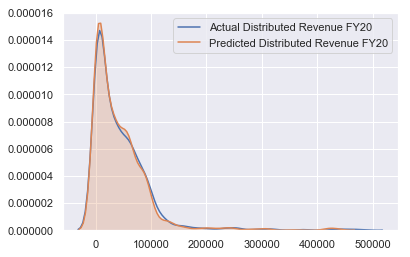

In [24]:
sns.set(style="darkgrid")
sns.kdeplot(rf_test['yearly_rev_dist'], label = 'Actual Distributed Revenue FY20' );
sns.kdeplot(rf_test['y_pred'], label = 'Predicted Distributed Revenue FY20', shade=True );

**Try Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
l_pred = l_reg.predict(X_test) 

In [27]:
y_test['l_pred']=l_pred
y_test

yearly_rev_dist        y_pred        l_pred
TERM  CRS_ID                                                  
2019F ACCTB202001     96031.655263  89039.001977  82324.042726
      ACCTB202002     99461.357237  84825.826631  87511.292726
      ACCTB202003     30867.317763  30566.543259  25729.159914
      ACCTB202WZ1     20578.211842  17430.101153  15684.105226
      ACCTB202YZ1     17148.509868  13876.455346  11921.312258
...                            ...           ...           ...
      VISAA349001     28788.853542  23948.157196  22742.855226
      VISAA373001     35186.376552  30989.547634  28803.167726
      VISAA445001      3198.761505   2558.397563    427.558351
      VISAA450001     31987.615047  26534.426271  26081.417726
      VISAA457051      6397.523009   5244.232442   3279.823976

[1396 rows x 3 columns]

In [28]:
l_test = y_test.dropna()
#RMSE
np.sqrt(mean_squared_error(l_test['l_pred'], l_test['yearly_rev_dist']))

6892.479640213145

In [29]:
l_test[['yearly_rev_dist', 'l_pred']].describe()

,yearly_rev_dist,l_pred
count,1395.000000,1395.000000
mean,44301.752996,41667.459801
std,54730.884320,53040.927839
min,0.000000,-33556.707274
25%,7135.988897,5142.323976
50%,30301.019114,28659.624758
75%,64341.646093,60856.816164
max,485662.228100,458312.667726


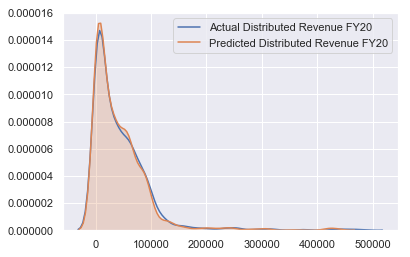

In [30]:
sns.set(style="darkgrid")
sns.kdeplot(l_test['yearly_rev_dist'], label = 'Actual Distributed Revenue FY20' );
sns.kdeplot(l_test['y_pred'], label = 'Predicted Distributed Revenue FY20', shade=True );

 # Predict for FY21
 **Use both linear and rf models**

In [31]:
past['yearly_rev_dist'][pd.isna(past['yearly_rev_dist'])]=0

In [32]:
train = past.drop('yearly_rev_dist', axis = 1)
train.set_index(['TERM', 'CRS_ID'], inplace=True)
train_y = past[['TERM', 'CRS_ID', 'yearly_rev_dist']]
train_y.set_index(['TERM', 'CRS_ID'], inplace=True)
predict = current
predict.set_index(['TERM', 'CRS_ID'], inplace=True)

In [33]:
predict['STU_DEPT_Honors'].sum() #add 6 to the number of students dropped from the analysis

6

In [34]:
predict.drop('STU_DEPT_Honors', axis=1, inplace=True)

In [35]:
rf = RandomForestRegressor(random_state=42)
rf.fit(train, train_y)
rf_pred = rf.predict(predict)

lr = LinearRegression()
lr.fit(train, train_y)
lr_pred = lr.predict(predict)

predict['rf_pred']=rf_pred
predict['lr_pred']=lr_pred

predict.head()

ValueError: Number of features of the model must match the input. Model n_features is 53 and input n_features is 51 

In [ ]:
predict[['rf_pred', 'lr_pred']].describe()

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(predict['rf_pred'], label = 'Predicted RF Revenue FY21' );
sns.kdeplot(predict['lr_pred'], label = 'Predicted LR Revenue FY21', shade=True );

In [ ]:
predict

In [ ]:
predict.reset_index(inplace=True)
predict['CRS_ID'].count()

In [ ]:
predict.head()

In [ ]:
FY21 = predict[['TERM', 'CRS_ID', 'CRS_AT_HRS', 'Enrollment', 'rf_pred', 'lr_pred']]
FY21.head()

In [ ]:
FY21.CRS_ID.count()

In [ ]:
FY21.CRS_ID.count() - FY21.CRS_ID.nunique()

In [ ]:
FY21['lr_pred'].sum()

In [290]:
FY21['rf_pred'].sum()

65779605.91588524

In [292]:
FY21[['lr_pred', 'rf_pred']].describe() #use rf_pred

,lr_pred,rf_pred
count,1.319000e+03,1319.000000
mean,8.882404e+10,49870.815706
std,1.016634e+12,54988.388623
min,-3.114591e+04,0.000000
25%,8.852155e+03,9070.730685
50%,3.798240e+04,37944.671940
75%,7.564312e+04,73876.200291
max,1.171588e+13,468499.446851


In [294]:
FY21[FY21['lr_pred']>1000000] #crazy numbers - can't rely on this

,TERM,CRS_ID,CRS_AT_HRS,Enrollment,rf_pred,lr_pred
18,2020F,BA B100004,150.0,50,148254.429641,1.171588e+13
76,2020F,BIOLT121F05,69.0,23,61504.900906,1.171588e+13
191,2020F,COSCA211001,60.0,20,54231.719184,1.171588e+13
339,2020F,ENGLT122014,60.0,20,50782.935597,1.171588e+13
399,2020F,HISTQ234001,99.0,33,96941.026769,1.171588e+13
402,2020F,HISTQ250002,99.0,33,94260.882231,1.171588e+13
426,2020F,HISTT200002,99.0,33,91158.681408,1.171588e+13
428,2020F,HISTT256001,93.0,31,91439.260419,1.171588e+13
1112,2020F,POLSX259001,93.0,31,88977.974576,1.171588e+13
1117,2020F,PSYCA100002,96.0,32,88208.959753,1.171588e+13


In [295]:
FY21.drop('lr_pred', inplace=True, axis =1)

# Import Faculty Data and Merge

In [296]:
fac21 = pd.read_excel('../1_data/Faculty Course.xlsx', header=3)
fac21.fillna(method='ffill', inplace=True)
fac21 = fac21[['Course,College', 'Course,Dept of,Record', 'Instructor ID','Crs Sect ID', 'FDB_College', 'FDB_Dept']]
fac21.rename(columns = {'Course,College':'Course College','Course,Dept of,Record':'Course Dept','Instructor ID':'INST_ID', 
                        'Crs Sect ID':'CRS_ID'}, inplace=True)
fac21.head()

,Course College,Course Dept,INST_ID,CRS_ID,FDB_College,FDB_Dept
0,BU,ACCT,10147448.0,ACCTB300001,BU,Accounting
1,BU,ACCT,10222864.0,ACCTB202001,BU,Accounting
2,BU,ACCT,10222864.0,ACCTB305001,BU,Accounting
3,BU,ACCT,10222864.0,ACCTB306001,BU,Accounting
4,BU,ACCT,10222864.0,ACCTB310001,BU,Accounting


In [297]:
fac21['CRS_ID'].count()

1101

In [298]:
fac21.groupby(['INST_ID', 'CRS_ID']).ngroups - fac21['CRS_ID'].count()

-1

In [299]:
z_i = fac21.pivot_table(index=['INST_ID', 'CRS_ID'], aggfunc='size')
z_i = pd.DataFrame(z_i)
z_i = z_i[z_i[0]>1]
z_i.reset_index(inplace=True)
z_i['dups']=1
z_i.drop(0, axis=1,inplace=True)
z_i

,INST_ID,CRS_ID,dups
0,10119753.0,ARTHO160002,1


In [300]:
fac21[(fac21['INST_ID']==10119753.0) & (fac21['CRS_ID']=='ARTHO160002')]

,Course College,Course Dept,INST_ID,CRS_ID,FDB_College,FDB_Dept
1099,MA,VISA,10119753.0,ARTHO160002,MA,Department of Art
1100,Grand Total,VISA,10119753.0,ARTHO160002,MA,Department of Art


In [301]:
fac21=fac21[fac21['Course College']!='Grand Total']
fac21[(fac21['INST_ID']==10119753.0) & (fac21['CRS_ID']=='ARTHO160002')]

,Course College,Course Dept,INST_ID,CRS_ID,FDB_College,FDB_Dept
1099,MA,VISA,10119753.0,ARTHO160002,MA,Department of Art


In [302]:
fac21.groupby(['INST_ID', 'CRS_ID']).ngroups - fac21['CRS_ID'].count()

0

In [303]:
fac21['CRS_ID'].count()

1100

In [313]:
combined = fac21.merge(FY21, on='CRS_ID', how='outer', validate='m:1')

In [314]:
combined['CRS_ID'].nunique()

1328

In [315]:
combined['rf_pred'].sum()

66571820.22029805

In [316]:
combined['TERM'][pd.isna(combined['Course College'])].count()

247

In [317]:
z_i = combined.pivot_table(index=['CRS_ID'], aggfunc='size')
z_i = pd.DataFrame(z_i)
z_i = z_i[z_i[0]>1]
z_i.reset_index(inplace=True)
z_i.rename(columns={0:'dups'}, inplace=True)
#z_i.drop(0, axis=1,inplace=True)
z_i

,CRS_ID,dups
0,DSGNM200051,2
1,LAW L896003,2
2,LAW L897005,2
3,MUENM201051,2
4,MUPRM190051,2
5,NURSG945Y04,2
6,PFOLB100051,2
7,PFOLB200051,2
8,PFOLB300051,2
9,PFOLB400051,2


In [318]:
combined = combined.merge(z_i, on='CRS_ID', how='outer')

In [319]:
combined[pd.notna(combined['dups'])]

,Course College,Course Dept,INST_ID,CRS_ID,FDB_College,FDB_Dept,TERM,CRS_AT_HRS,Enrollment,rf_pred,dups
17,BU,BA,10191345.0,PFOLB100051,BU,Management,2020F,0.0,117.0,0.000000,2.0
18,BU,BA,10291522.0,PFOLB100051,BU,Management,2020F,0.0,117.0,0.000000,2.0
19,BU,BA,10191345.0,PFOLB200051,BU,Management,2020F,0.0,124.0,0.000000,2.0
20,BU,BA,10291522.0,PFOLB200051,BU,Management,2020F,0.0,124.0,0.000000,2.0
21,BU,BA,10191345.0,PFOLB300051,BU,Management,2020F,0.0,98.0,0.000000,2.0
22,BU,BA,10291522.0,PFOLB300051,BU,Management,2020F,0.0,98.0,0.000000,2.0
23,BU,BA,10191345.0,PFOLB400051,BU,Management,2020F,0.0,111.0,0.000000,2.0
24,BU,BA,10291522.0,PFOLB400051,BU,Management,2020F,0.0,111.0,0.000000,2.0
651,CNH,NURS,10082856.0,NURSG945Y04,CNH,School of Nursing,2020F,6.0,2.0,6182.025061,2.0
652,CNH,NURS,10305044.0,NURSG945Y04,CNH,School of Nursing,2020F,6.0,2.0,6182.025061,2.0


In [320]:
combined['dups'][pd.isna(combined['dups'])]=1
combined['rf_pred'] = combined['rf_pred']/combined['dups']

In [321]:
combined.drop('dups',axis=1, inplace=True)

In [322]:
combined.head()

,Course College,Course Dept,INST_ID,CRS_ID,FDB_College,FDB_Dept,TERM,CRS_AT_HRS,Enrollment,rf_pred
0,BU,ACCT,10147448.0,ACCTB300001,BU,Accounting,2020F,48.0,16.0,50950.484888
1,BU,ACCT,10222864.0,ACCTB202001,BU,Accounting,2020F,114.0,38.0,127805.178831
2,BU,ACCT,10222864.0,ACCTB305001,BU,Accounting,2020F,63.0,21.0,71211.253453
3,BU,ACCT,10222864.0,ACCTB306001,BU,Accounting,2020F,30.0,10.0,33722.833972
4,BU,ACCT,10222864.0,ACCTB310001,BU,Accounting,2020F,72.0,24.0,77191.065173


In [323]:
combined['rf_pred'].sum() #previous = 65779605.91588524, exactly the same - great

65779605.91588524

In [325]:
combined.to_excel('../3_res/FY21 Projected Data.xlsx', index=False)

Send Donna the list of missing courses